In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Reading the files
data1 = pd.read_csv('CAvideos.csv')
data2 = pd.read_csv('GBvideos.csv')
data3 = pd.read_csv('USvideos.csv')
#Converting to NumPy arrays
a1 = np.array(data1)
a2 = np.array(data2)
a3 = np.array(data3)
#Adding Column for country
aCA = np.insert(a1, 16, 'Canada', axis=1)
aGB = np.insert(a2, 16, 'Great Britain', axis=1)
aUS = np.insert(a3, 16, 'United States', axis=1)
#Concatenating arrays
Final = np.concatenate((aCA,aGB,aUS), axis=0)
#Sorting by column 4 'category_id', can sort by any column
Test = Final[Final[:, 4].argsort()]
#print(Test)

In [31]:
#Decision Tree 1: Testing to see how accurate a decision tree model classified based on views, likes, and comment count can predict video category
import numpy as np
from sklearn import tree

#Setting the features and target
features1 = Test[: ,[7,8,10]] # views(7), likes(8), comment_count(10)
target1 = Test[: ,[4]] # category_id(4)
X = np.array(features1, dtype=np.float32)
y = np.array(target1, dtype=np.float32)

#Split into train and test data - 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Build decision tree 1
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)                
Y = clf.predict(X_test)               
print("Accuracy of Decision Tree 1:",metrics.accuracy_score(y_test, Y))

Accuracy of Decision Tree 1: 0.5113736749116607


In [32]:
#Decision Tree 2: - Adding in dislikes as classifier to see if this will improve the accuracy of the model
features2 = Test[: ,[7,8,9,10]] # views(7), likes(8), dislikes(9), comment_count(10)
target2 = Test[: ,[4]] # category_id(4)
X2 = np.array(features2, dtype=np.float32)
y2 = np.array(target2, dtype=np.float32)

#Split the dataset into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

#Build decision tree 2
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X2_train,y2_train)                
Y2 = clf2.predict(X2_test)               
print("Accuracy of Decision Tree 2:",metrics.accuracy_score(y2_test, Y2))

Accuracy of Decision Tree 2: 0.5826523851590106


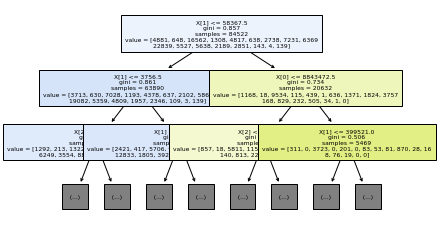

In [33]:
dt1 = tree.plot_tree(clf, max_depth=2, feature_names=None, class_names=None, label='all', filled=True, impurity=True, node_ids=False, proportion=False, fontsize='6')

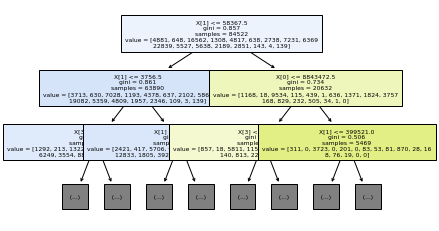

In [34]:
dt2 = tree.plot_tree(clf2, max_depth=2, feature_names=None, class_names=None, label='all', filled=True, impurity=True, node_ids=False, proportion=False, fontsize='6')